# 타이타닉 데이터

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

## EDA

## 데이터 전처리

In [2]:
titanic_data = pd.read_excel('./data/titanic.xls')
titanic_data.head()

# - embarked : 탑승장소별 컬럼 추가
# S=Southhampton, C=Cherbourg, Q=Queenstown
titanic_data["Embarked_C"] = titanic_data["embarked"] == "C"
titanic_data["Embarked_S"] = titanic_data["embarked"] == "S"
titanic_data["Embarked_Q"] = titanic_data["embarked"] == "Q"


# 데이터에서 여성을 1로 남성을 0으로 설정
titanic_data.loc[titanic_data["sex"] == "male", "sex"] = 0 
titanic_data.loc[titanic_data["sex"] == "female", "sex"] = 1

# fare : 지불한 운임
mean_fare = titanic_data["fare"].mean()

# 결측치 채움
titanic_data.loc[ pd.isnull(titanic_data["fare"]) , "fare"] = mean_fare
titanic_data[pd.isnull(titanic_data["fare"])]

titanic_data.head()
titanic_data.info()

# Feature 선택
# X = 객실 클래스, 성별, 요금, 선착장 3개, 총 6요소
feature_names = ["pclass", "sex", "fare", "Embarked_C", "Embarked_Q", "Embarked_S"]

X = titanic_data[feature_names]

print(X.shape)
X.head()

# 정답셋 준비
# y = "survived"
label_name = "survived"

y = titanic_data[label_name]

print(y.shape)
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pclass      1309 non-null   int64  
 1   survived    1309 non-null   int64  
 2   name        1309 non-null   object 
 3   sex         1309 non-null   object 
 4   age         1046 non-null   float64
 5   sibsp       1309 non-null   int64  
 6   parch       1309 non-null   int64  
 7   ticket      1309 non-null   object 
 8   fare        1309 non-null   float64
 9   cabin       295 non-null    object 
 10  embarked    1307 non-null   object 
 11  boat        486 non-null    object 
 12  body        121 non-null    float64
 13  home.dest   745 non-null    object 
 14  Embarked_C  1309 non-null   bool   
 15  Embarked_S  1309 non-null   bool   
 16  Embarked_Q  1309 non-null   bool   
dtypes: bool(3), float64(3), int64(4), object(7)
memory usage: 147.1+ KB
(1309, 6)
(1309,)


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [3]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=13)

In [21]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [22]:
print(np.round(model.score(X_train, y_train), 4))
print(np.round(model.score(X_test, y_test), 4))

0.8005
0.8168


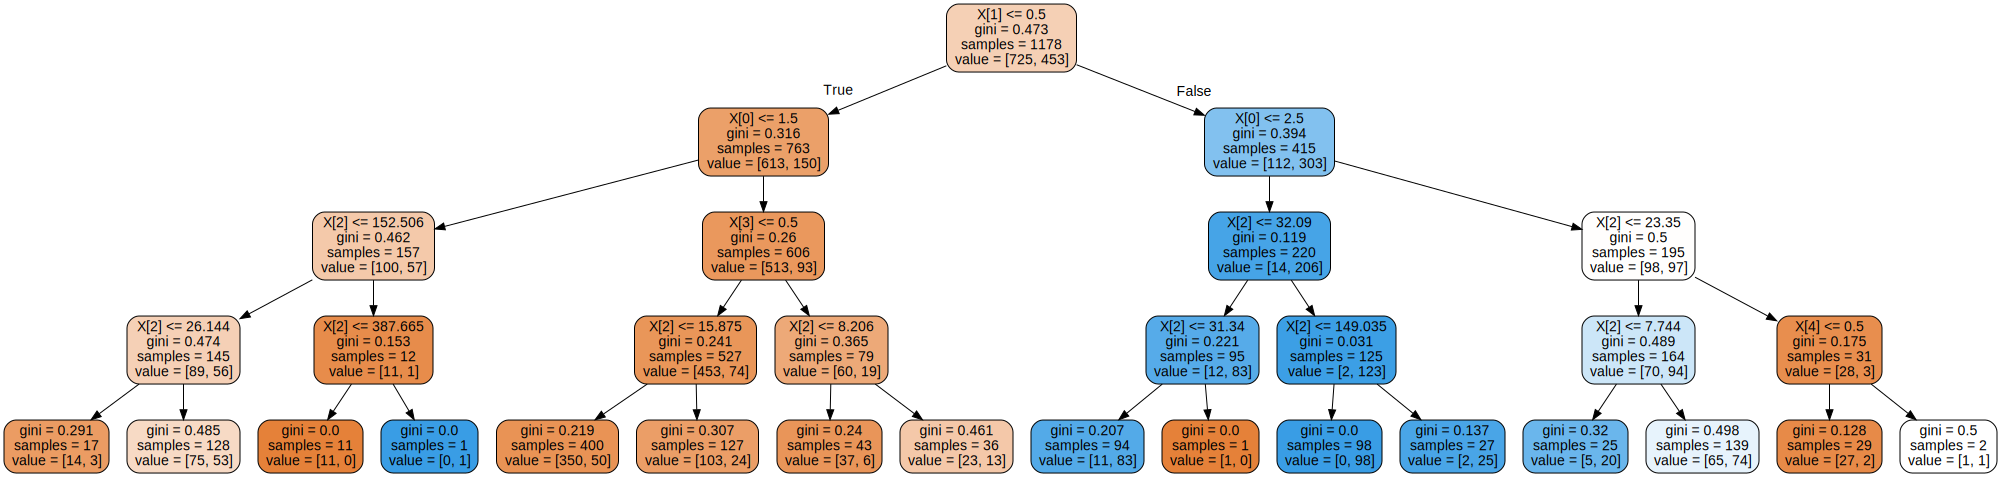

In [23]:
# 트리 구조 시각화하기
from sklearn.tree import export_graphviz
import graphviz

dot_graph = export_graphviz(model, out_file=None,
                           impurity=True, filled=True, rounded=True)
display( graphviz.Source(dot_graph) )

In [30]:
# 실제 데이터를 넣어서 예측하기
dicaprio = [3., 0., 19., True, False, False]
winslet  = [1., 1., 17., False, False, True]

model.predict([dicaprio, winslet])
model.predict_proba([dicaprio, winslet])

array([[0.63888889, 0.36111111],
       [0.11702128, 0.88297872]])

In [31]:
model.feature_importances_

array([0.21879591, 0.65926614, 0.11301285, 0.00593001, 0.00299509,
       0.        ])